## 12-30-2025
# Module 0: Setup & Data Loading

**Purpose:**
- Load sample metadata from CSV
- Verify BAM files exist for all samples  
- Create sample manifest for downstream analysis

**Inputs:**
- `data/metadata/sample_metadata.csv`
- `data/raw/*.bam` files

**Outputs:**
- `data/processed/sample_manifest.csv`
- Summary statistics

In [6]:
from pathlib import Path
import os
import pandas as pd
import sys

print("Current directory:", os.getcwd())

# Import Module 0 functions
from src.data_loader import (
    load_metadata,
    verify_bam_files,
    create_manifest,
    summarize_manifest,
    run_module_0
)

Current directory: /Users/maggiebrown/Desktop/PrimaMente/wgbs_classifier


## Quick Run: Execute Complete Module 0

Run all steps at once:

In [7]:
# Run complete Module 0 pipeline
manifest = run_module_0()


MODULE 0: Setup & Data Loading

Step 1: Loading metadata...
✓ Loaded metadata: 22 samples
  Columns: ['Run', 'AGE', 'Assay Type', 'AvgSpotLen', 'Bases', 'batch', 'BioProject', 'BioSample', 'Bytes', 'Center Name', 'Consent', 'DATASTORE filetype', 'DATASTORE provider', 'DATASTORE region', 'disease_status', 'Experiment', 'GEO_Accession (exp)', 'Instrument', 'LibraryLayout', 'LibrarySelection', 'LibrarySource', 'Molecule', 'Organism', 'Platform', 'ReleaseDate', 'create_date', 'version', 'Sample Name', 'source_name', 'SRA Study', 'tissue']

Step 2: Verifying BAM files...

Verifying BAM files in: /Users/maggiebrown/Desktop/PrimaMente/wgbs_classifier/data/raw
Using pattern: {run_id}.*.bam
✓ Verified all BAM files: 22 samples
  Example: SRR13404367.deduplicated.sorted_ds10mill_chr21.bam

Step 3: Creating sample manifest...

✓ Created sample manifest
  Columns: ['sample_id', 'disease_status', 'batch', 'age', 'bam_path']

SAMPLE MANIFEST SUMMARY

Total samples: 22
  ALS: 12 (54.5%)
  Control: 1

## Step-by-Step Execution

Or run each step individually to see what's happening:

In [8]:
# Step 1: Load metadata
print("STEP 1: Loading metadata")
print("-" * 50)

metadata = load_metadata()
print(f"\nLoaded {len(metadata)} samples")
print(f"Columns: {list(metadata.columns)}")

# Display first few rows
metadata.head()

STEP 1: Loading metadata
--------------------------------------------------
✓ Loaded metadata: 22 samples
  Columns: ['Run', 'AGE', 'Assay Type', 'AvgSpotLen', 'Bases', 'batch', 'BioProject', 'BioSample', 'Bytes', 'Center Name', 'Consent', 'DATASTORE filetype', 'DATASTORE provider', 'DATASTORE region', 'disease_status', 'Experiment', 'GEO_Accession (exp)', 'Instrument', 'LibraryLayout', 'LibrarySelection', 'LibrarySource', 'Molecule', 'Organism', 'Platform', 'ReleaseDate', 'create_date', 'version', 'Sample Name', 'source_name', 'SRA Study', 'tissue']

Loaded 22 samples
Columns: ['Run', 'AGE', 'Assay Type', 'AvgSpotLen', 'Bases', 'batch', 'BioProject', 'BioSample', 'Bytes', 'Center Name', 'Consent', 'DATASTORE filetype', 'DATASTORE provider', 'DATASTORE region', 'disease_status', 'Experiment', 'GEO_Accession (exp)', 'Instrument', 'LibraryLayout', 'LibrarySelection', 'LibrarySource', 'Molecule', 'Organism', 'Platform', 'ReleaseDate', 'create_date', 'version', 'Sample Name', 'source_name'

,Run,AGE,Assay Type,AvgSpotLen,Bases,batch,BioProject,BioSample,Bytes,Center Name,...,Molecule,Organism,Platform,ReleaseDate,create_date,version,Sample Name,source_name,SRA Study,tissue
0,SRR13404367,61,OTHER,202,82723603378,discovery,PRJNA691320,SAMN17284840,25878998190,GEO,...,cell-free DNA,Homo sapiens,ILLUMINA,2021-02-24T00:00:00Z,2021-02-24T02:43:00Z,1,GSM5014683,blood,SRP301293,blood
1,SRR13404368,57,OTHER,202,118577486116,discovery,PRJNA691320,SAMN17284839,37890270985,GEO,...,cell-free DNA,Homo sapiens,ILLUMINA,2021-01-13T00:00:00Z,2021-01-12T01:13:00Z,1,GSM5014684,blood,SRP301293,blood
2,SRR13404369,85,OTHER,202,118058120482,discovery,PRJNA691320,SAMN17284838,37139646441,GEO,...,cell-free DNA,Homo sapiens,ILLUMINA,2021-01-13T00:00:00Z,2021-01-12T01:14:00Z,1,GSM5014685,blood,SRP301293,blood
3,SRR13404370,63,OTHER,202,103573600392,discovery,PRJNA691320,SAMN17284837,32989822483,GEO,...,cell-free DNA,Homo sapiens,ILLUMINA,2021-01-13T00:00:00Z,2021-01-12T00:46:00Z,1,GSM5014686,blood,SRP301293,blood
4,SRR13404371,60,OTHER,202,98333165296,discovery,PRJNA691320,SAMN17284836,30899519904,GEO,...,cell-free DNA,Homo sapiens,ILLUMINA,2021-02-24T00:00:00Z,2021-02-24T03:02:00Z,1,GSM5014687,blood,SRP301293,blood


In [9]:
# Step 2: Verify BAM files exist
print("\nSTEP 2: Verifying BAM files")
print("-" * 50)

metadata_with_paths = verify_bam_files(metadata)

# Show first few bam paths
print("\nExample BAM paths:")
for i, path in enumerate(metadata_with_paths['bam_path'].head(3)):
    print(f"  {i+1}. {Path(path).name}")


STEP 2: Verifying BAM files
--------------------------------------------------

Verifying BAM files in: /Users/maggiebrown/Desktop/PrimaMente/wgbs_classifier/data/raw
Using pattern: {run_id}.*.bam
✓ Verified all BAM files: 22 samples
  Example: SRR13404367.deduplicated.sorted_ds10mill_chr21.bam

Example BAM paths:
  1. SRR13404367.deduplicated.sorted_ds10mill_chr21.bam
  2. SRR13404368.deduplicated.sorted_ds10mill_chr21.bam
  3. SRR13404369.deduplicated.sorted_ds10mill_chr21.bam


In [10]:
# Step 3: Create clean manifest
print("\nSTEP 3: Creating sample manifest")
print("-" * 50)

manifest = create_manifest(metadata_with_paths)

# Display manifest
manifest.head(10)


STEP 3: Creating sample manifest
--------------------------------------------------

✓ Created sample manifest
  Columns: ['sample_id', 'disease_status', 'batch', 'age', 'bam_path']


,sample_id,disease_status,batch,age,bam_path
0,SRR13404367,als,discovery,61,/Users/maggiebrown/Desktop/PrimaMente/wgbs_cla...
1,SRR13404368,als,discovery,57,/Users/maggiebrown/Desktop/PrimaMente/wgbs_cla...
2,SRR13404369,als,discovery,85,/Users/maggiebrown/Desktop/PrimaMente/wgbs_cla...
3,SRR13404370,als,discovery,63,/Users/maggiebrown/Desktop/PrimaMente/wgbs_cla...
4,SRR13404371,ctrl,discovery,60,/Users/maggiebrown/Desktop/PrimaMente/wgbs_cla...
5,SRR13404372,ctrl,discovery,59,/Users/maggiebrown/Desktop/PrimaMente/wgbs_cla...
6,SRR13404373,ctrl,discovery,83,/Users/maggiebrown/Desktop/PrimaMente/wgbs_cla...
7,SRR13404374,ctrl,discovery,62,/Users/maggiebrown/Desktop/PrimaMente/wgbs_cla...
8,SRR13404375,als,validation,69,/Users/maggiebrown/Desktop/PrimaMente/wgbs_cla...
9,SRR13404376,als,validation,56,/Users/maggiebrown/Desktop/PrimaMente/wgbs_cla...


In [11]:
# Step 4: Print summary statistics
summarize_manifest(manifest)


SAMPLE MANIFEST SUMMARY

Total samples: 22
  ALS: 12 (54.5%)
  Control: 10 (45.5%)

By batch:
  Discovery: 8
  Validation: 14

Disease status × Batch:
batch           discovery  validation  Total
disease_status                              
als                     4           8     12
ctrl                    4           6     10
Total                   8          14     22

Age statistics (all samples):
  Mean ± SD: 64.0 ± 8.8 years
  Range: 53 - 85 years

Age by disease status:
                mean  std  min  max
disease_status                     
als             63.8  9.2   53   85
ctrl            64.1  8.8   54   83

Age by batch:
            mean   std  min  max
batch                           
discovery   66.2  11.1   57   85
validation  62.6   7.3   53   74


## Additional exploration

Sample counts by disease status:
disease_status
als     12
ctrl    10
Name: count, dtype: int64

Sample counts by batch:
batch
validation    14
discovery      8
Name: count, dtype: int64


Matplotlib is building the font cache; this may take a moment.


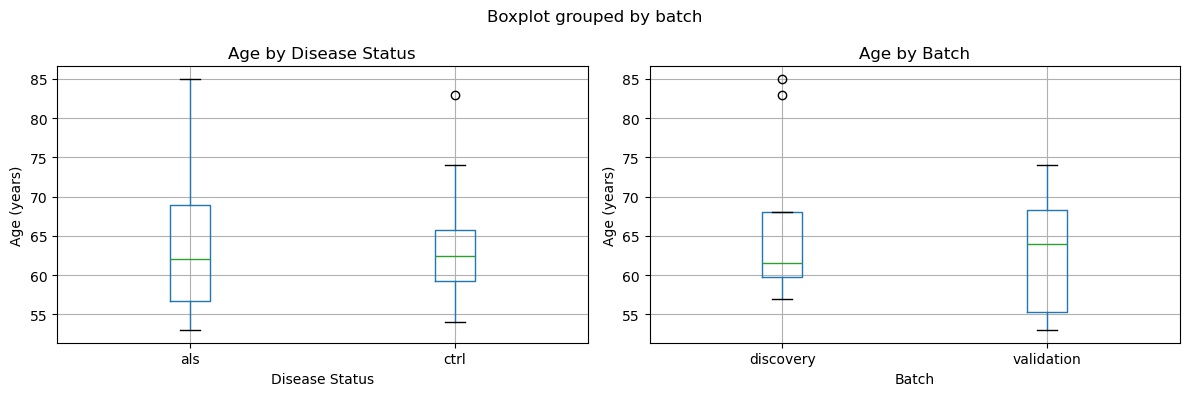

In [12]:
# Sample counts by group
print("Sample counts by disease status:")
print(manifest['disease_status'].value_counts())

print("\nSample counts by batch:")
print(manifest['batch'].value_counts())

# Age distribution
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Age by disease status
manifest.boxplot(column='age', by='disease_status', ax=axes[0])
axes[0].set_title('Age by Disease Status')
axes[0].set_xlabel('Disease Status')
axes[0].set_ylabel('Age (years)')

# Age by batch
manifest.boxplot(column='age', by='batch', ax=axes[1])
axes[1].set_title('Age by Batch')
axes[1].set_xlabel('Batch')
axes[1].set_ylabel('Age (years)')

plt.tight_layout()
plt.show()

## Check age between disease groups

In [13]:
# Check if age differs between disease groups
from scipy.stats import mannwhitneyu

als_age = manifest[manifest['disease_status'] == 'als']['age']
ctrl_age = manifest[manifest['disease_status'] == 'ctrl']['age']

stat, p_value = mannwhitneyu(als_age, ctrl_age)

print("Age comparison: ALS vs Control")
print(f"  ALS mean age: {als_age.mean():.1f} ± {als_age.std():.1f}")
print(f"  Control mean age: {ctrl_age.mean():.1f} ± {ctrl_age.std():.1f}")
print(f"  Mann-Whitney U test p-value: {p_value:.4f}")

if p_value < 0.05:
    print("  ⚠️  Significant age difference between groups - may need to account for this")
else:
    print("  ✓ No significant age difference between groups")

Age comparison: ALS vs Control
  ALS mean age: 63.8 ± 9.2
  Control mean age: 64.1 ± 8.8
  Mann-Whitney U test p-value: 0.9474
  ✓ No significant age difference between groups


In [15]:
# Save manifest (if not already saved by run_module_0)
from src.config import SAMPLE_MANIFEST, PROCESSED_DIR

PROCESSED_DIR.mkdir(parents=True, exist_ok=True)
manifest.to_csv(SAMPLE_MANIFEST, index=False)

print(f"✓ Saved manifest to: {SAMPLE_MANIFEST}")
print(f"\nManifest shape: {manifest.shape}")
print(f"Columns: {list(manifest.columns)}")

✓ Saved manifest to: /Users/maggiebrown/Desktop/PrimaMente/wgbs_classifier/data/processed/sample_manifest.csv

Manifest shape: (22, 5)
Columns: ['sample_id', 'disease_status', 'batch', 'age', 'bam_path']


## Summary

Module 0 complete! ✓

**Created:**
- `data/processed/sample_manifest.csv`

**Next step:**
- Module 1: Quality Control & Filtering (notebook `02_qc_analysis.ipynb`)